<a href="https://colab.research.google.com/github/kapibara3chi/DeepLearningPredictionOfScalarValue/blob/main/DeepLearningPredictionOfScalarValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.I.
- [ ] csvデータの読み込み
- [x] 精度の確認方法
- [ ] 精度の改善方法
- [▶] 同一 ハイパーパラメータでの最適モデルの選択方法の実装
- [ ] モデル構成、 ハイパーパラメーターの最適化方法の実装
- [ ] モデルの保存、外部出力方法
- [ ] 外部モデルの参照方法


## モデルを外部出力する

## 外部モデルを参照する

# 0.pip

In [1]:
!pip install numpy tensorflow scikit-learn

# 基本コードの理解

## code

train data
data shape(404, 13)
data type:<class 'numpy.ndarray'>
data ex:[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
Number of test data:102
(102, 13)
Number of train data:404
(404, 13)
行数:404,列数:13
13
Epoch 1/100
41/41 [==============================] - 2s 21ms/step - loss: 172.0403 - mae: 9.9192 - val_loss: 84.8795 - val_mae: 6.6094
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 97.9450 - mae: 7.1545 - val_loss: 84.8338 - val_mae: 6.9471
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 66.8656 -

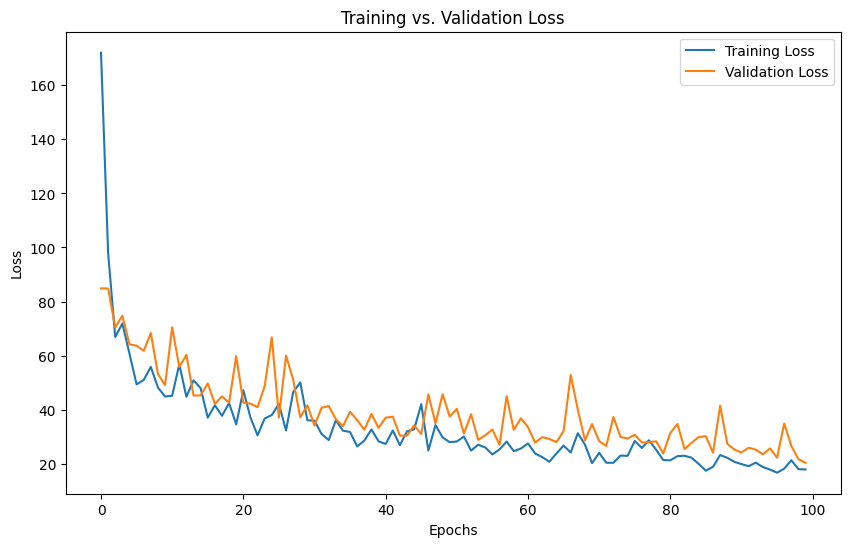

4/4 [==============================] - 0s 4ms/step
予測された住宅価格: 12.17, 実際の住宅価格: 7.2
予測された住宅価格: 20.81, 実際の住宅価格: 18.8
予測された住宅価格: 22.49, 実際の住宅価格: 19.0
予測された住宅価格: 31.26, 実際の住宅価格: 27.0
予測された住宅価格: 23.35, 実際の住宅価格: 22.2
予測された住宅価格: 21.53, 実際の住宅価格: 24.5
予測された住宅価格: 29.23, 実際の住宅価格: 31.2
予測された住宅価格: 23.35, 実際の住宅価格: 22.9
予測された住宅価格: 19.46, 実際の住宅価格: 20.5
予測された住宅価格: 19.32, 実際の住宅価格: 23.2
予測された住宅価格: 15.38, 実際の住宅価格: 18.6
予測された住宅価格: 19.55, 実際の住宅価格: 14.5
予測された住宅価格: 18.70, 実際の住宅価格: 17.8
予測された住宅価格: 35.76, 実際の住宅価格: 50.0
予測された住宅価格: 19.20, 実際の住宅価格: 20.8
予測された住宅価格: 21.62, 実際の住宅価格: 24.3
予測された住宅価格: 25.04, 実際の住宅価格: 24.2
予測された住宅価格: 21.27, 実際の住宅価格: 19.8
予測された住宅価格: 17.57, 実際の住宅価格: 19.1
予測された住宅価格: 26.39, 実際の住宅価格: 22.7
予測された住宅価格: 11.73, 実際の住宅価格: 12.0
予測された住宅価格: 12.77, 実際の住宅価格: 10.2
予測された住宅価格: 20.23, 実際の住宅価格: 20.0
予測された住宅価格: 16.36, 実際の住宅価格: 18.5
予測された住宅価格: 24.19, 実際の住宅価格: 20.9
予測された住宅価格: 23.20, 実際の住宅価格: 23.0
予測された住宅価格: 28.03, 実際の住宅価格: 27.5
予測された住宅価格: 39.49, 実際の住宅価格: 30.1
予測された住宅価格: 14.27, 実際の住宅価格: 9.5
予測された住宅価格: 23.95, 実際の住宅

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys


# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
## データの確認
print("train data")
print(f"data shape{train_data.shape}")
print(f"data type:{type(train_data)}")
print(f"data ex:{train_data}")
print(f"Number of test data:{len(test_data)}")
print(test_data.shape)
print(f"Number of train data:{len(train_data)}")
print(train_data.shape)

num_rows,num_cols=train_data.shape
print(f"行数:{num_rows},列数:{num_cols}")
print(train_data.shape[1])
# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
#input_shape:データ列数のタプル※単一次元なので(,)つき
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 過学習の防止 Early stopping
# from tensorflow.keras.callbacks import EarlyStopping
## EarlyStoppingコールバックを作成
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# モデルの学習
# history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping_callback])
history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2)

# モデルの評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
# test_loss, test_mae = model.evaluate(test_data, test_labels,verbose=1)
print(f"Test Loss:{test_loss:.3f}")
print(f"Test MAE: {test_mae:.2f}")



import matplotlib.pyplot as plt
# トレーニングと検証の損失をプロット
print(type(history.history))
print(f"loss :{history.history['loss']}")
print(f"loss numb:{len(history.history['loss'])}")
print(f"val loss :{history.history['val_loss']}")
print(f"val_loss numb:{len(history.history['val_loss'])}")
# モデルの学習曲線をプロット
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

# テストデータセット上で予測を行う
predictions = model.predict(test_data)

# 予測結果を出力する
for i, prediction in enumerate(predictions):
    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")




# 過学習の防止の実装

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys


# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
## データの確認
# print("train data")
# print(f"data shape{train_data.shape}")
# print(f"data type:{type(train_data)}")
# print(f"data ex:{train_data}")
# print(f"Number of test data:{len(test_data)}")
# print(test_data.shape)
# print(f"Number of train data:{len(train_data)}")
# print(train_data.shape)

num_rows,num_cols=train_data.shape
print(f"行数:{num_rows},列数:{num_cols}")
print(train_data.shape[1])
# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
#input_shape:データ列数のタプル※単一次元なので(,)つき
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 過学習の防止 Early stopping
from tensorflow.keras.callbacks import EarlyStopping
## EarlyStoppingコールバックを作成
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# モデルの学習
history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping_callback])

# モデルの評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
# test_loss, test_mae = model.evaluate(test_data, test_labels,verbose=1)
print(f"Test Loss:{test_loss:.3f}")
print(f"Test MAE: {test_mae:.2f}")

# 最適モデルの選択


import matplotlib.pyplot as plt
# トレーニングと検証の損失をプロット
print(type(history.history))
print(f"loss :{history.history['loss']}")
print(f"loss numb:{len(history.history['loss'])}")
print(f"val loss :{history.history['val_loss']}")
print(f"val_loss numb:{len(history.history['val_loss'])}")
# モデルの学習曲線をプロット
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()




'''
# テストデータセット上で予測を行う
predictions = model.predict(test_data)

# 予測結果を出力する
for i, prediction in enumerate(predictions):
    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")
'''




行数:404,列数:13
13
Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 912.4150 - mae: 20.4063 - val_loss: 84.5393 - val_mae: 6.5200
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 68.6705 - mae: 6.1292 - val_loss: 66.2462 - val_mae: 6.1875
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 54.9252 - mae: 5.1701 - val_loss: 67.4916 - val_mae: 5.4830
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 53.2434 - mae: 4.9518 - val_loss: 61.2787 - val_mae: 5.3723
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 52.0268 - mae: 4.8845 - val_loss: 65.7951 - val_mae: 5.1907
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 49.9966 - mae: 5.0073 - val_loss: 57.9506 - val_mae: 5.4112
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 48.0704 - mae: 4.7701 - val_loss: 56.7693 - val_mae: 5.1999
Epoch 8/100
41/41 [==============================] 

KeyboardInterrupt: 

# 同一パラメータでのモデルの選択

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys


# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
## データの確認
# print("train data")
# print(f"data shape{train_data.shape}")
# print(f"data type:{type(train_data)}")
# print(f"data ex:{train_data}")
# print(f"Number of test data:{len(test_data)}")
# print(test_data.shape)
# print(f"Number of train data:{len(train_data)}")
# print(train_data.shape)

num_rows,num_cols=train_data.shape
print(f"行数:{num_rows},列数:{num_cols}")
print(train_data.shape[1])
# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
#input_shape:データ列数のタプル※単一次元なので(,)つき
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 過学習の防止 Early stopping
from tensorflow.keras.callbacks import EarlyStopping
## EarlyStoppingコールバックを作成
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# モデルの学習
history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping_callback])

# モデルの評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
# test_loss, test_mae = model.evaluate(test_data, test_labels,verbose=1)
print(f"Test Loss:{test_loss:.3f}")
print(f"Test MAE: {test_mae:.2f}")

# 最適モデルの選択


import matplotlib.pyplot as plt
# トレーニングと検証の損失をプロット
print(type(history.history))
print(f"loss :{history.history['loss']}")
print(f"loss numb:{len(history.history['loss'])}")
print(f"val loss :{history.history['val_loss']}")
print(f"val_loss numb:{len(history.history['val_loss'])}")
# モデルの学習曲線をプロット
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()




'''
# テストデータセット上で予測を行う
predictions = model.predict(test_data)

# 予測結果を出力する
for i, prediction in enumerate(predictions):
    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")
'''




# 修正版

## code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 特徴エンジニアリング
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# データの分割
X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, train_labels, test_size=0.2, random_state=42)

# モデルの学習
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

# テストデータで予測
predictions = model.predict(test_data_scaled)

# 予測結果の表示
for i in range(len(predictions)):
    print(f"Predicted price for test sample {i+1}: {predictions[i][0]:.2f}")


Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 578.0020 - mae: 21.9834 - val_loss: 399.1860 - val_mae: 18.4708
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 484.7554 - mae: 19.6662 - val_loss: 300.9702 - val_mae: 15.6599
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 335.5976 - mae: 15.6595 - val_loss: 164.1272 - val_mae: 11.0418
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 153.3750 - mae: 9.8638 - val_loss: 58.3031 - val_mae: 6.1396
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 62.4075 - mae: 5.8590 - val_loss: 36.7153 - val_mae: 4.7353
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 42.9342 - mae: 4.6946 - val_loss: 27.6430 - val_mae: 4.0705
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 32.4276 - mae: 4.0021 - val_loss: 24.0610 - val_mae: 3.6930
Epoch 8/100
21/21 [==============================] - 0s